### conversion project
课程重点：
- 数据分析的基础流程
- csv数据的加载和使用
- matplotlib 中 countplot, barplot 的选择和使用

Python里面内置了很多数据分析的函数包，我们首先加载必要的函数

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 数据准备

首先加载数据，并查看数据类型
- data.head() 得知数据组成
- data.info() 返回数据结构
- data.describe() 会返回常用的统计数据，包括中位数，众数，最大值和最小值


In [3]:
data = pd.read_csv(r'tkc_dataset/01. conversion_project.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


从加载的数据可以看出，文章包括国家、年龄、来源、访问页面总次数、新用户标识和转换率6个特征。

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


做一个简单的除去离群值的操作

In [4]:
data = data[data['age']<90]
data.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


### Data Analysis
我们使用groupby()函数从数据表中抽取特征。groupby() 是一种很常见的用法，可以提取出DataFrame对象里面有用的列组合，同时不会改变原始数据。

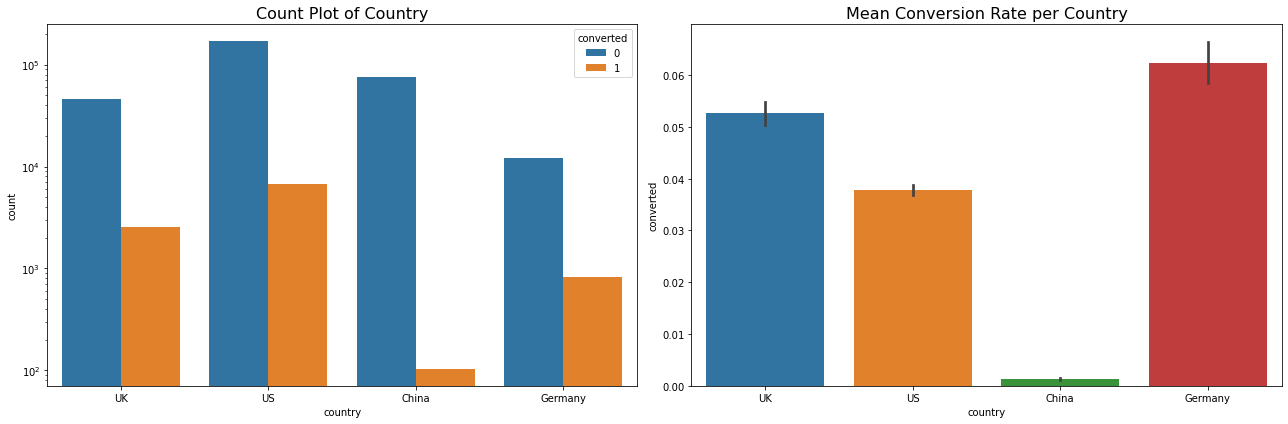

In [10]:
grouped = data[['country', 'converted']].groupby('country').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='country', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)

plt.tight_layout()
plt.show()

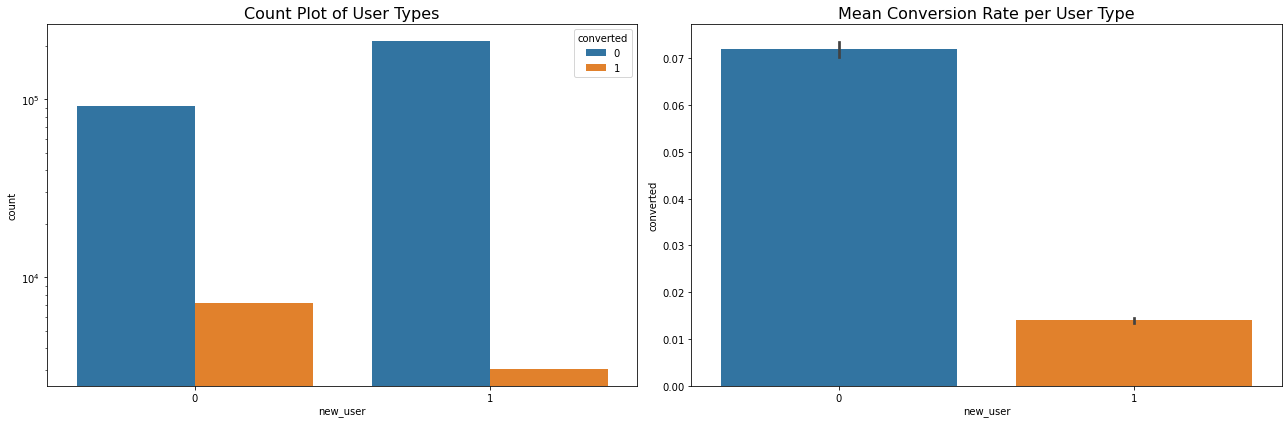

In [7]:
grouped = data[['new_user', 'converted']].groupby('new_user').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x='new_user', hue='converted',data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='new_user', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()

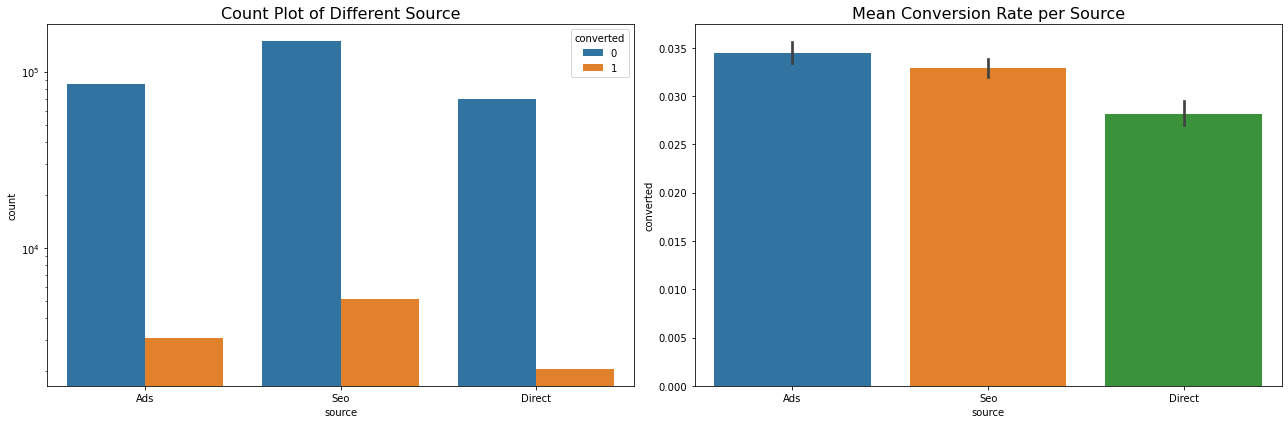

In [8]:
grouped = data[['source', 'converted']].groupby('source').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x='source', hue='converted',data=data, ax=ax[0])
ax[0].set_title('Count Plot of Different Source', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='source', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
hist_kes = {'histtyppe': 'bar','edgecolor': 'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.displot()